Importing Required Libraries

In [34]:
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.datasets import load_digits
#digits = load_digits()

Uploading the training and testing dataset

In [35]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

Splitting the training dataset into further into train and development data set

In [45]:


r = 7 #random seed
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]
X_train, X_dev, y_train,  y_dev = train_test_split(X_train, y_train, test_size=10000, random_state=r)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_dev shape: ',X_dev.shape)
print('y_dev shape: ',y_dev.shape)

X_train shape:  (50000, 784)
y_train shape:  (50000,)
X_dev shape:  (10000, 784)
y_dev shape:  (10000,)


Using Sklearn RandomForestClassifier; Checking the various parameters

In [40]:

untuned_clf = RandomForestClassifier(random_state=r)
untuned_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}

Fitting the model, getting the predictons and the accuracy score using development dataset

In [41]:
untuned_clf.fit(X_train, y_train)
dev_preds = untuned_clf.predict(X_dev)
print('Accuracy: ', accuracy_score(y_dev,dev_preds))

Accuracy:  0.968


### Refining the Model

#### The current accuracy score is high at 0.968 i.e., using development dataset, the model correctly classifies in 96.8% of the cases.Lets explore if we can further improve the accuracy of the model by tuning the hyperparameters

With Randomforestclassifier, the parameter I chose for tuning is the max depth, which represents the depth of each tree in the forest. The deeper the tree, the more splits it has and captures more information about the data. However, as the max depth value increased, the risk of overfitting increases too i.e., model fits the training data very well with low training error, but fails to generalize well when given new unseen data with increased testing error. To overcome the inherent risk of max_depth used in the untuned model, lets identify the best depth as a way of tuning the parameter and model


Lets choose Maxdepth parameter to tune. We start with chosing the depths in the range of 2 to 50 (with increments of 3 to reduce the processing load on system memory) and plot the accuracy of training and development data. 



In [48]:
tuning_depths = range(2,51,3)
tuning_scores_train = []
tuning_scores_dev = []

for d in tuning_depths:
    tuning_clf = RandomForestClassifier(max_depth=d,random_state=r)
    tuning_clf.fit(X_train,y_train)
    score_train = tuning_clf.score(X_train,y_train)
    score_dev = tuning_clf.score(X_dev,y_dev)
    tuning_scores_train.append(score_train)
    tuning_scores_dev.append(score_dev)


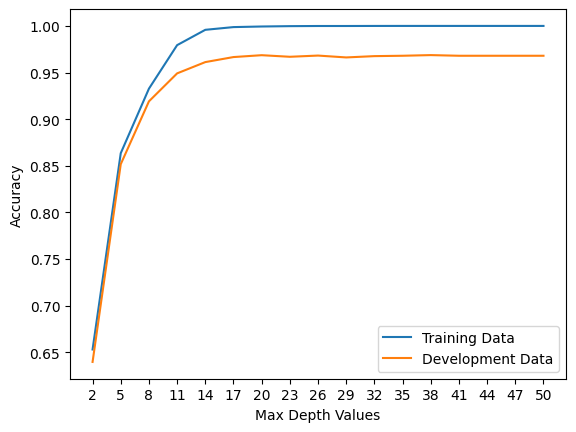

In [49]:


fig, ax = plt.subplots()
ax.plot(tuning_depths,tuning_scores_train, label = 'Training Data')
ax.plot(tuning_depths,tuning_scores_dev, label = 'Development Data')
plt.xlabel("Max Depth Values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(tuning_depths)
ax.legend()
plt.show()

Utilizing argmax function to identify the best depth is shown at 38. However our visual observation on the plots above shows that the optimum accuracy score is reached around 14 as the accuracy increases incrementally to its maximimum and then plateaus for both training and development dataset. 

Based on this, I conclude that the optimum value of the max depth parameter is 14 as it reduces the risk of overfitting.

In [50]:
best_depth = tuning_depths[np.argmax(tuning_scores_dev)]
print('Best Performance reached at depth of: ', best_depth)

Best Performance reached at depth of:  38


Lets create final random forest model using the best depth of 14

In [51]:
tuned_clf = RandomForestClassifier(max_depth=14, random_state=r)
tuned_clf.fit(X_train,y_train)
test_preds = tuned_clf.predict(X_test)


## Testing the Model

Now that we have tuned the model, lets use it on test data set and utilize confusion matrix and related metrics on how well the model performs.



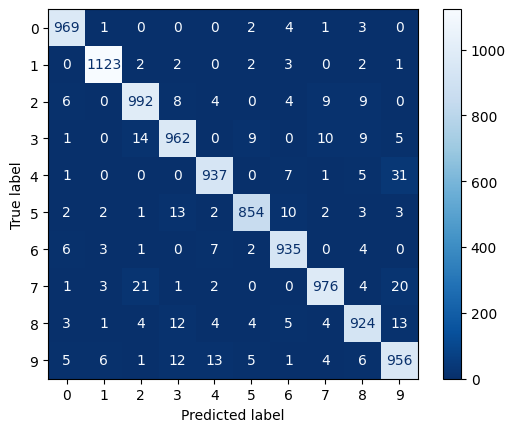

In [52]:
#obtain a confusion matrix comparing the predictions to the gold labels
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap = 'Blues_r')

In [53]:
#Compute a confustion matrix for each class or sample
print(multilabel_confusion_matrix(y_test,test_preds))

[[[8995   25]
  [  11  969]]

 [[8849   16]
  [  12 1123]]

 [[8924   44]
  [  40  992]]

 [[8942   48]
  [  48  962]]

 [[8986   32]
  [  45  937]]

 [[9084   24]
  [  38  854]]

 [[9008   34]
  [  23  935]]

 [[8941   31]
  [  52  976]]

 [[8981   45]
  [  50  924]]

 [[8918   73]
  [  53  956]]]


In [54]:
#obtain the accuracy, precision and recall scores
print(classification_report(y_test, test_preds,digits=3))

              precision    recall  f1-score   support

           0      0.975     0.989     0.982       980
           1      0.986     0.989     0.988      1135
           2      0.958     0.961     0.959      1032
           3      0.952     0.952     0.952      1010
           4      0.967     0.954     0.961       982
           5      0.973     0.957     0.965       892
           6      0.965     0.976     0.970       958
           7      0.969     0.949     0.959      1028
           8      0.954     0.949     0.951       974
           9      0.929     0.947     0.938      1009

    accuracy                          0.963     10000
   macro avg      0.963     0.963     0.963     10000
weighted avg      0.963     0.963     0.963     10000



The classification report returns the precision, recall and f1 score for the overall model as well as for each class. 

The classification report confirms that the model struggles the most to correctly predict class 9 as I see that this class has the lowest precision, recall and f1 score

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print('Accuracy: ', accuracy_score(y_test,test_preds))
print('Precision: ', precision_score(y_test,test_preds, average = 'macro'))
print('Recall: ', recall_score(y_test,test_preds, average = 'macro'))
print('F1 Score: ', f1_score(y_test,test_preds, average = 'macro'))


Accuracy:  0.9628
Precision:  0.9627192782864473
Recall:  0.9625038671185593
F1 Score:  0.9625726235724613




The overall model shows:

Accuracy at 96.28% - The accuracy is the proportion of correct predictions that the model has made on the test data.
Precision at 96.27% - Precision is the proportion of predictions of the positive class that is correct i.e., an indication of the ability of the model not to label as positive, when a sample is actually negative
Recall at 96.25% - Recall is a measure of how many instances of a class the model is able to recognize i.e., an indication of the ability of the model to find all the positive samples
F1 score at 96.25% - F1 score is the average of precision and Recall, with a high score indicating that the model has both decent recall and precision, as these two aspects of the model  often form a trade-off